<a href="https://colab.research.google.com/github/dote7ant/SVM_/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis for Nairobi Hospital clinical camp hypothyroidism data.

#### Introduction

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#### 1. Defining the question.

The data is focused on thyroid patients. Using this data we are required to build a model that determines whether a patient has hypothyroid or not. We will be working with SVM, decision trees and random forests.

#### 2. Defining the metrics of succes.

#### 3. Understanding the context.

#### 4. Recording the experimental design.

## 1. Reading the data and importing all the required libraries


In [ ]:
# Import libraries
import pandas as pd
import numpy as np

# graphings
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# forests and decision tree imports as well as train test 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Import Suport Vector Classifier module from svm library.
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA


# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, mean_absolute_error

# graphic for the forests and trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Loading the data set

In [ ]:
# url to hold the path to the data set
url = "/content/hypothyroid.csv"

# read the data set and create a dataframe 
df = pd.read_csv(url)

# display some rows in the data set
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


## 2. Check the data

Check the column names

In [ ]:
# check the column names
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

We do not see any column names that we will want to rename. Below is the data set glossary.
1. Age
2. Sex
3. on_thyroxine
4. query_on_thyroxine
5. on_antithyroid_medicationthyroid_surgery
6. query_hypothyroid
7. query_hyperthyroid
8. pregnant
9. sick
10. tumor
11. lithium
12. goitre
13. TSH_measured
14. TSH
15. T3_measured
16. T3
17. TT4_measured
18.  TT4

Let us preview our data

In [ ]:
# preview the first 10 rows
df.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.60,y,1.02,y,7.50,n,?


In [ ]:
# preview the last 10 rows
df.tail(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3153,negative,78,F,f,f,f,f,f,t,f,f,f,f,f,y,0,y,1.70,y,106,y,1.03,y,99,n,?
3154,negative,72,F,t,f,f,f,f,f,f,f,f,f,f,y,0.01,y,1.10,y,240,y,1.07,y,223,n,?
3155,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,2.40,y,123,y,0.99,y,124,n,?
3156,negative,40,F,f,f,f,f,f,f,f,t,f,f,f,y,2.10,y,1.20,y,76,y,0.90,y,84,n,?
3157,negative,69,F,f,f,f,f,f,f,f,f,f,f,f,y,2.60,y,1.80,y,126,y,1.02,y,124,n,?
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


We can observe that some rows have question marks. We need to investigate this.

In [ ]:
# check the column data types 
print("The data types in our data set for various columns is as shown below:\n")
df.info()
print("-----------------------------------------------------------------------")

The data types in our data set for various columns is as shown below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   obje

There are a total of 26 columns and 3163 entries which we also see that there are 3163 non-null values. This tells us that there are no missing values in our data. But we do have the question marks that we had previously observed. All the data types are classified as object that is string. Age clearly cannot be a string. TSH, T3, TT4, T4U, FTI are also classified as objects but should be floats. We will need to change this to the appropriate data types.

In [ ]:
# check number of rows and columns in the data set
df.shape
print("There are", df.shape[0], "rows and", df.shape[1], "columns in our data set.")

There are 3163 rows and 26 columns in our data set.


In [ ]:
# check the unique values in the data set
for column in df.columns:
  print("***************************", column, "********************************")
  print("This column has", df[column].nunique(), "unique values, they are shown below:\n")
  print(df[column].unique())
  print('________________________________________________________________________________________________\n')
  print('________________________________________________________________________________________________\n')

*************************** status ********************************
This column has 2 unique values, they are shown below:

['hypothyroid' 'negative']
________________________________________________________________________________________________

________________________________________________________________________________________________

*************************** age ********************************
This column has 93 unique values, they are shown below:

['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
__________________________________________________________________

So what can we observe. Some columns have boolean that atleast that is our assumption. Others have numerical data and others categorical data. We do also get to see the question mark. But we had observed that all the columns have an object data type so this needs to be changed to the appropriate data types.

In [ ]:
# check for missing values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

The data set contains no missing values.

In [ ]:
# check for duplicates
print("There are duplicates in our data set:", df.duplicated().any())

There are duplicates in our data set: True


In [ ]:
# show the values that are duplicates except the first occurence
df[df.duplicated()]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


We have 77 rows with duplicates this are alot. We will drop them later on. We cannot plot boxplots here since the data types are still not change so we will do it after the tidying.

## 3. Tidying up the data

We will remove duplicates, change the column data types to the appropriate ones, change the ? to null and then determine what to do with them. And finally check for outliers.

In [ ]:
# start with removing duplicates

# drop our duplicates that we found
df.drop_duplicates(keep='first', inplace = True)

df1 = df.copy()
# confirm there are no more duplicates
print("The data has duplicates: ", df1.duplicated().any())

The data has duplicates:  False


In [ ]:
# we check how many rows and columns we have
print("There are", df1.shape[0], "rows and", df1.shape[1], "columns in our data set.")

There are 3086 rows and 26 columns in our data set.


There are no more duplicates

In [ ]:
# we have to replace the question mark with null as we determined this is missing data 
df1.replace('?', np.nan, inplace=True)

In [ ]:
# find missing values
df1.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

We can now observe that age, sex, TSH, T3, TT4, T4U, FTI have missing values. TBG has so many missing values close the amount of data we have. We will just drop this column and its TBG_measured column.

In [ ]:
# dropping the TBG and TBG_measured columns 
df1.drop(['TBG', 'TBG_measured'], axis = 1, inplace = True)

Success columns dropped successfully. We now impute the remaining columns with missing values with the mean.

In [ ]:
# filling missing values in the sex column with mode
df1['sex'].fillna(df1['sex'].mode()[0], inplace = True)

In [ ]:
pip install impyute

In [ ]:
# list of columns we will convert to float
num = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# convert the column data types to float 
for i in np.arange(0,6,1):
  df1[num[i]] = df1[num[i]].astype('float')

from impyute.imputation.cs import mice
train = df1[num]
# start the MICE training
imputed_training = mice(train.values)

# concatenate our data that is now imputed with the old data set
df_new = pd.concat([df1.drop(columns= num), pd.DataFrame(imputed_training, columns=num)], axis=1)

Why use MICE? Mice works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns. For more information about it [click here.](https://www.jstatsoft.org/article/view/v045i03/v45i03.pdf)

In [ ]:
# check for any repetition of columns
df_new.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [ ]:
# check for missing values
df_new.isnull().sum()

status                       75
sex                          75
on_thyroxine                 75
query_on_thyroxine           75
on_antithyroid_medication    75
thyroid_surgery              75
query_hypothyroid            75
query_hyperthyroid           75
pregnant                     75
sick                         75
tumor                        75
lithium                      75
goitre                       75
TSH_measured                 75
T3_measured                  75
TT4_measured                 75
T4U_measured                 75
FTI_measured                 75
age                          75
TSH                          75
T3                           75
TT4                          75
T4U                          75
FTI                          75
dtype: int64

In [ ]:
# drop missing values
df_new.dropna(inplace = True)

In [ ]:
# check for missing values
df_new.isnull().sum()

status                       0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
age                          0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
dtype: int64

In [ ]:
# check the shape
print("There are", df_new.shape[0], "rows and", df_new.shape[1], "columns in our data set.")

There are 3011 rows and 24 columns in our data set.


Our df1 had 3086 rows but after running mice we got null values in all the columns so we decided to drop them since there are not that many. We get a data set with 3011 rows which we are comfortable with.

In [ ]:
# change the data types for  age to integer

# start off by converting age to int
df_new['age'] = df_new['age'].astype('int')

# list of columns we will convert to categorical 
cat = ['status', 'sex','TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']
for column in cat:
  df_new[column] = df_new[column].astype('category')


# list of columns we will convert to boolean values
bool_ = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

# first we replace the f and t with False and True respectively
for column in bool_:
  df_new[column] = df_new[column].replace('f', False)
  df_new[column] = df_new[column].replace('t', True)
# we convert this columns to boolean
for column in bool_:
  df_new[column] = df_new[column].astype('bool')

# confirm if the change was successful
df_new.dtypes

status                       category
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
TSH_measured                 category
T3_measured                  category
TT4_measured                 category
T4U_measured                 category
FTI_measured                 category
age                             int64
TSH                           float64
T3                            float64
TT4                           float64
T4U                           float64
FTI                           float64
dtype: object

In [ ]:
# make a copy of the data frame
out = df_new.copy()

We now check for outliers.

In [ ]:
num = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [ ]:
# list of columns we will convert to float
cat = ['status', 'sex','TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 15))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92)
for i in np.arange(0, 11, 1):
  for ax, data, num in zip(axes.flatten(), out, out[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]):
    sns.boxplot(out[bool_[i]], out[num], ax = ax, palette = 'Set1')

# NB: When  I add the hue for sex I get an error that I have thus far not been able to fix. 
#### Red represents female and blue represents male

This is a boxplot for the outliers for the different numerical columns. We decide 

In [ ]:
num

'F'

## 4. Exploratory Data Analysis

### a. Univariate analysis

In [ ]:
df_clean = out.copy()

In [ ]:
# get brief summary statistics about our data
df_clean.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000
mean,51.658917,5.615451,1.979143,108.797901,0.980060,114.848829
std,19.248771,21.842725,0.904247,42.750732,0.217529,57.596420
min,1.000000,-51.958265,0.000000,2.000000,0.000000,0.000000
25%,37.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,53.000000,0.900000,1.900000,106.000000,0.970000,107.000000
75%,65.000000,4.700000,2.308639,124.000000,1.060000,126.000000
max,184.000000,530.000000,10.200000,450.000000,2.210000,881.000000


We observe that mean age is 51 years and the least age is 1 and max age is 184 this is clearly an outlier.

In [ ]:
# get the count for columns with the data type as object 
df_clean.describe(include=np.bool)

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
count,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011
unique,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False
freq,2577,2957,2970,2910,2779,2783,2950,2918,2971,3009,2921


We observe that through out all the boolean columns False is the most common response.

In [ ]:
# get the variance 
df_clean.var()

on_thyroxine                    0.123403
query_on_thyroxine              0.017618
on_antithyroid_medication       0.013436
thyroid_surgery                 0.032429
query_hypothyroid               0.071138
query_hyperthyroid              0.070012
pregnant                        0.019855
sick                            0.029943
tumor                           0.013112
lithium                         0.000664
goitre                          0.029007
age                           370.515185
TSH                           477.104641
T3                              0.817662
TT4                          1827.625107
T4U                             0.047319
FTI                          3317.347580
dtype: float64

There is high variance in FTI has the highest variance followed by TT4, TSH and age follow in that order. This tells use we might need to normalize our data.

In [ ]:
# get the kurtosis
df_clean.kurt()

on_thyroxine                    2.111698
query_on_thyroxine             50.863937
on_antithyroid_medication      68.568632
thyroid_surgery                24.889894
query_hypothyroid               8.077330
query_hyperthyroid              8.303841
pregnant                       44.457116
sick                           27.455779
tumor                          70.407318
lithium                      1502.997341
goitre                         28.535723
age                             1.877938
TSH                           187.828875
T3                             12.115310
TT4                             7.876664
T4U                             3.860711
FTI                            54.491023
dtype: float64

We observe that all our columns are leptokurtic. How is it useful? It is a useful measure of whether there is a problem with outliers in a data set. Larger kurtosis indicates a more serious outlier problem, and may lead the researcher to choose alternative statistical methods. We observe that lithium has a kurtosis of 1502 which is very big compared to the rest of the columns.

#### Distribution plots

In [ ]:
df_clean.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

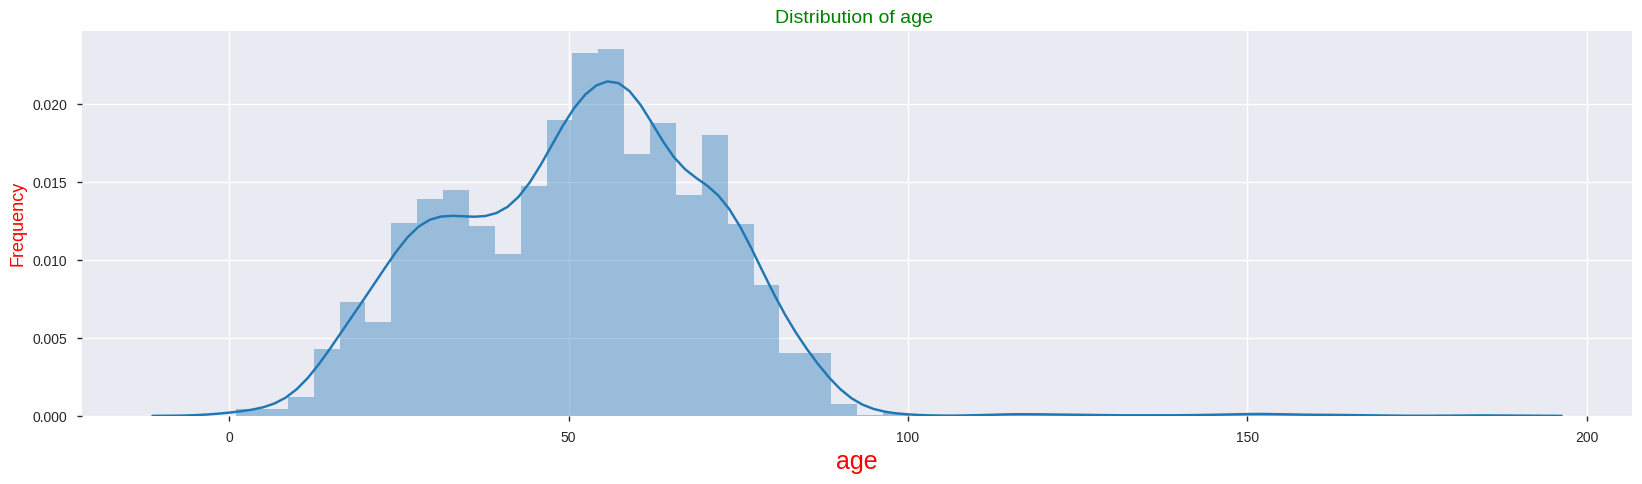

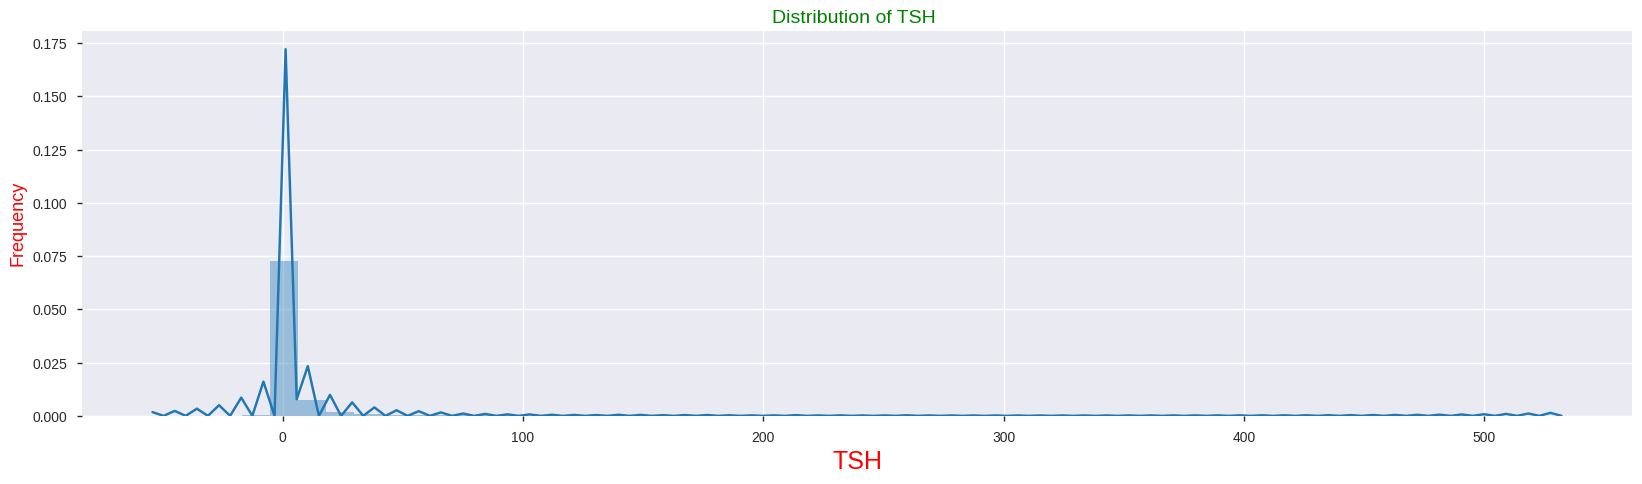

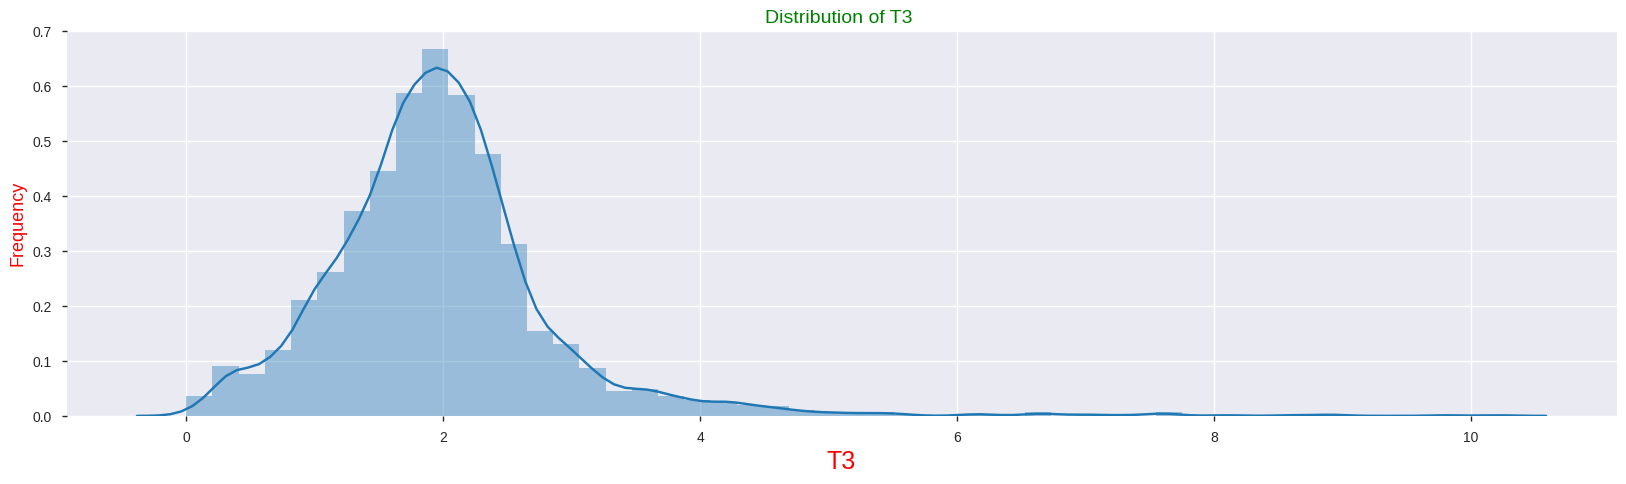

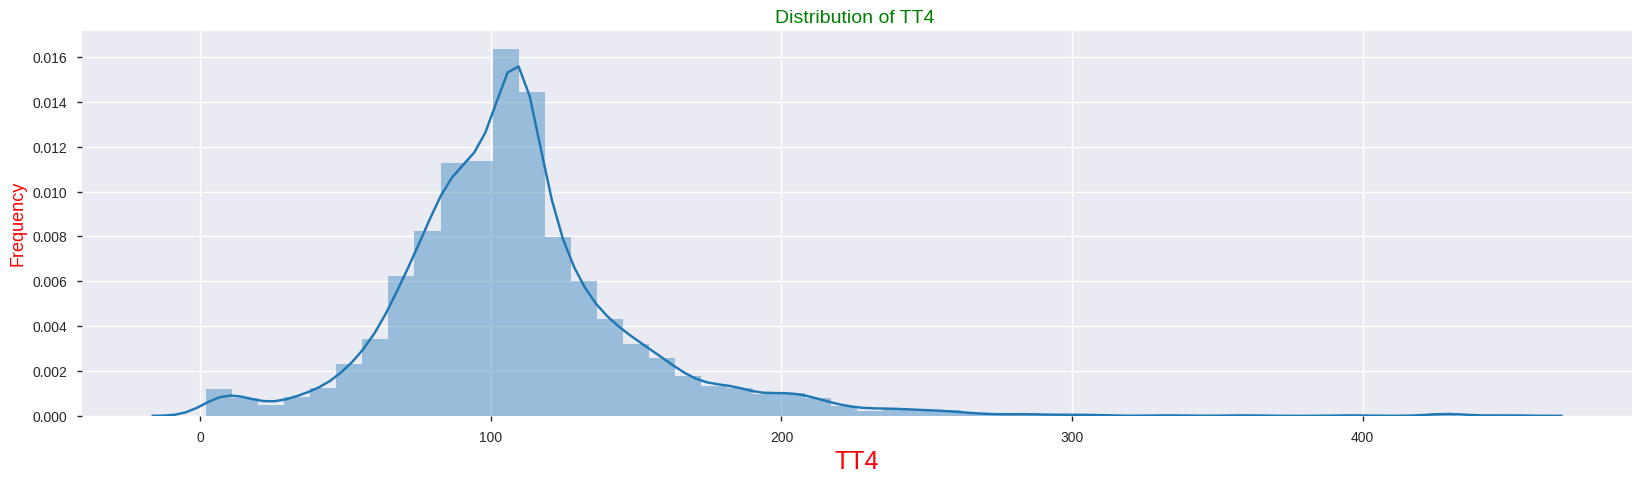

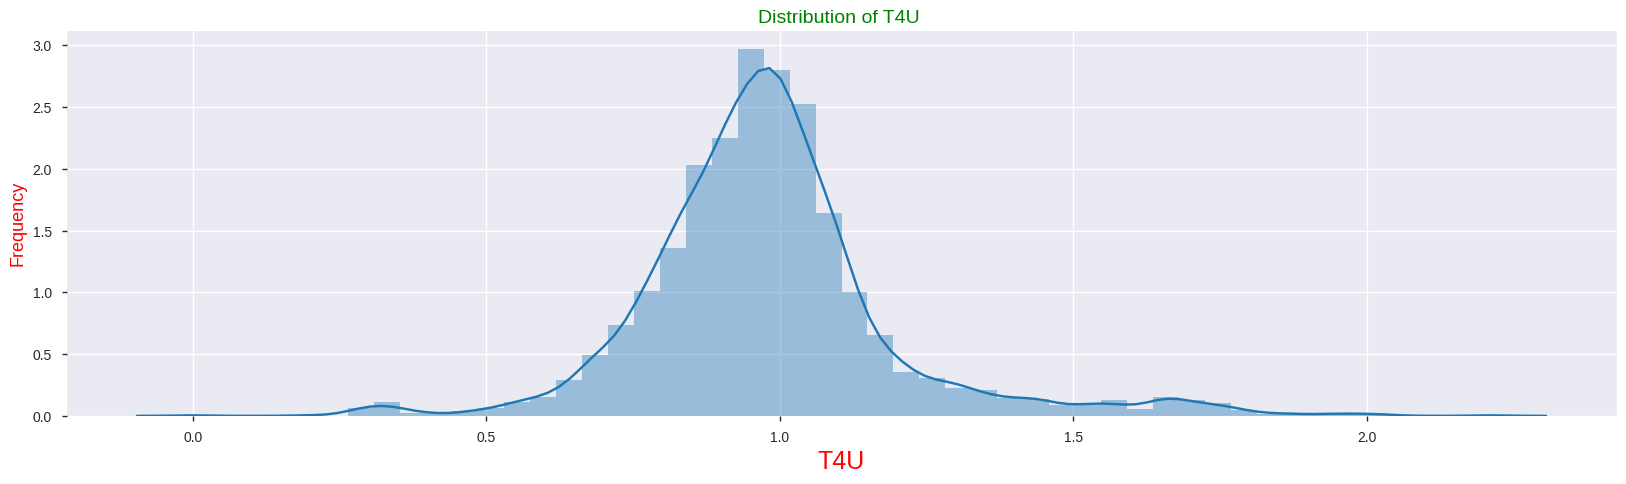

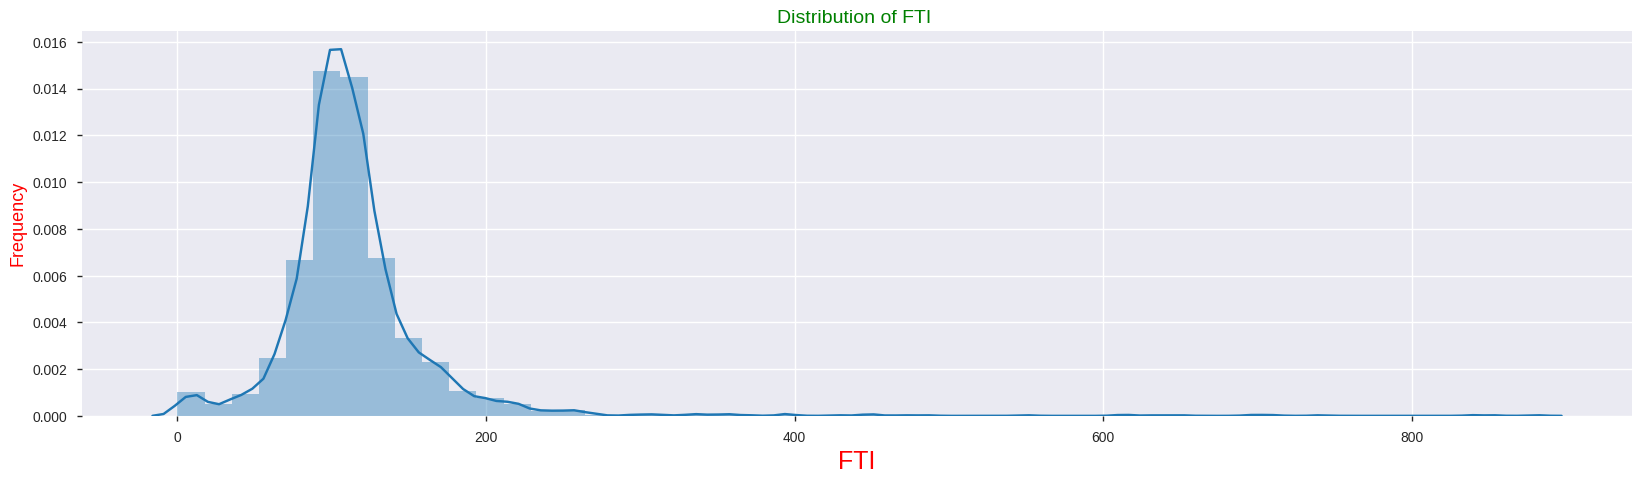

In [ ]:
# get the numerical data 
nums = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# loop to plot our distribution plots for our numerical data
for i in np.arange(0, 6, 1):
  plt.figure(figsize = (20, 5))
  sns.distplot(df_clean[nums[i]])
  plt.title(f'Distribution of {nums[i]} ', fontsize = 14, color = "green")
  plt.xlabel(nums[i], fontsize = 18, color = 'red')
  plt.ylabel('Frequency', fontsize = 13, color = 'red')

We observe tha age is skewed to the right, the other columns have a more bell shaped curve with tails on both ends. We need now to find the skewness of the data.




In [ ]:
# get the skewness of our data 
df_clean.skew()

on_thyroxine                  2.027386
query_on_thyroxine            7.268435
on_antithyroid_medication     8.397802
thyroid_surgery               5.183952
query_hypothyroid             3.173636
query_hyperthyroid            3.209100
pregnant                      6.813779
sick                          5.425637
tumor                         8.506501
lithium                      38.781426
goitre                        5.524198
age                           0.353871
TSH                          11.157060
T3                            2.145997
TT4                           1.553385
T4U                           0.971903
FTI                           5.534617
dtype: float64

We observe that our data is skewed to the right. This means that the median and mode is greater than the mean. Lithium is most skewed followed by TSH. Age is the least positively skewed column. The right tail is longer than the left tail.

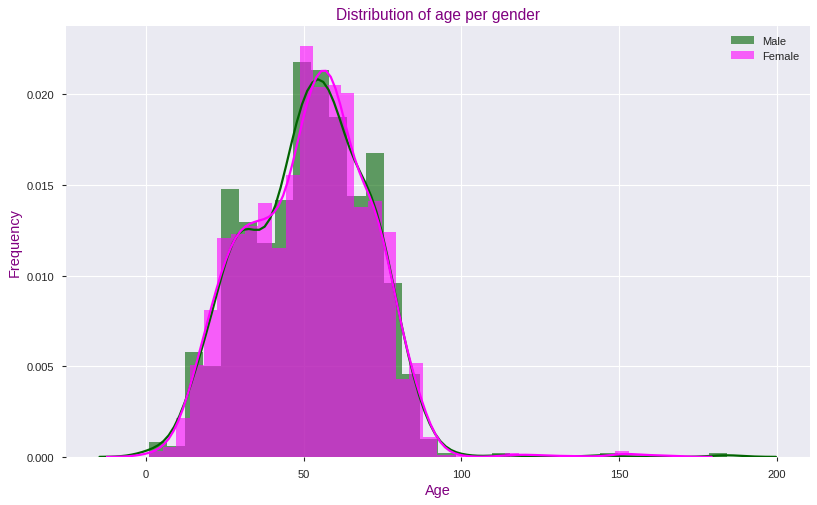

In [ ]:
male = df_clean.loc[df_clean.sex=='M', 'age']    # Selecting only male datapoints in the age column
female = df_clean.loc[df_clean.sex=='F', 'age']  # Selecting only female datapoints in the age column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="fuchsia", label="Female", **kwargs)
plt.title('Distribution of age per gender', fontsize = 14, color = 'purple')
plt.xlabel('Age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

#### Bar charts

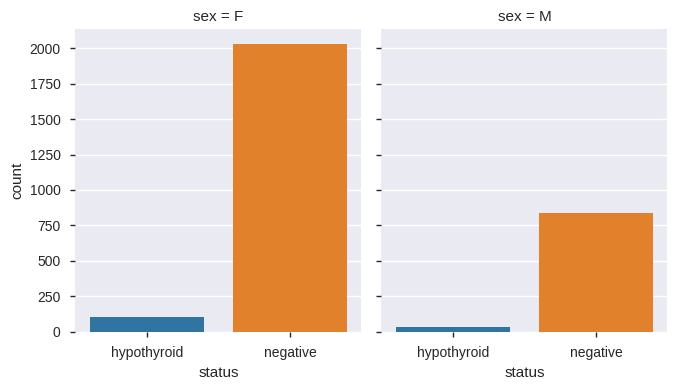

In [ ]:
# Plotting bar charts
sns.catplot("status", col="sex", col_wrap=4, data=df_clean, kind="count", height=4)
plt.show()

We observe that there are more negative cases of hypothyroid which might affect our ability to make accurate predictions. We also do observe that more women were tested and that more of them had hypothyroid compared to men.

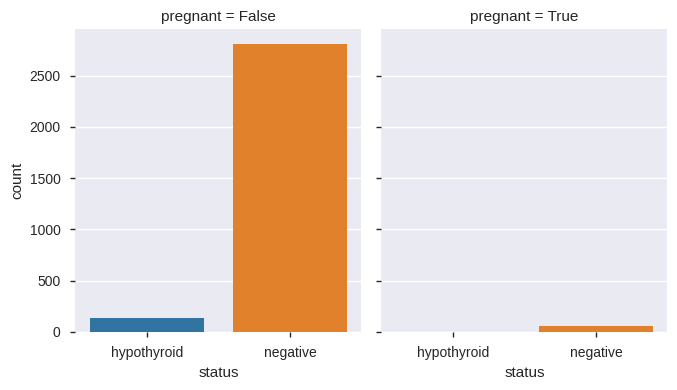

In [ ]:
# Plotting bar charts
sns.catplot("status", col= "pregnant", col_wrap=4, data=df_clean, kind="count", height=4, aspect=.8)
plt.show()

It is observed that pregnant women did not test positive for hypothyroid which is understandable as most female hormones behave differently during pregnancy.

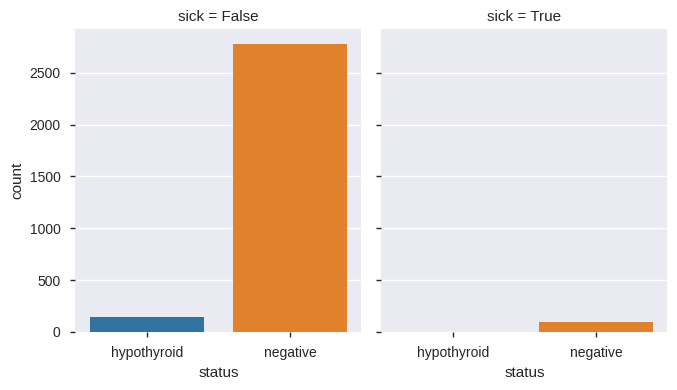

In [ ]:
# Plotting bar charts
sns.catplot("status", col="sick", col_wrap=4, data=df_clean, kind="count", height=4, aspect=.8)
plt.show()

Again if some one was sick they did not test positive for hypothyroid.

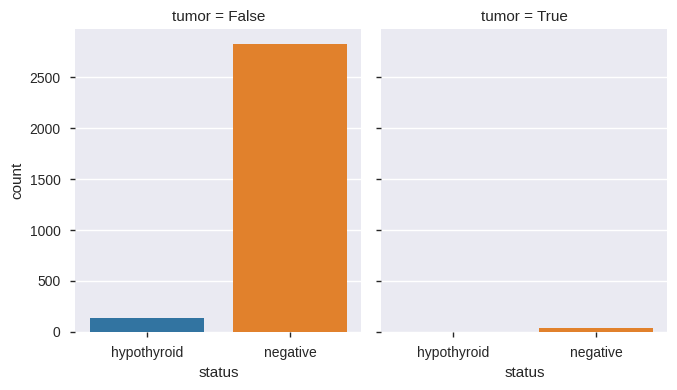

In [ ]:
# Plotting bar charts
sns.catplot("status", col="tumor", col_wrap=4, data=df_clean, kind="count", height=4, aspect=.8)
plt.show()

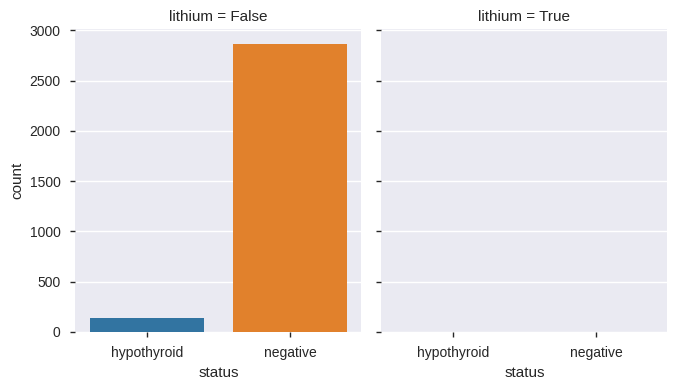

In [ ]:
# Plotting bar charts
sns.catplot("status", col="lithium", col_wrap=4, data=df_clean, kind="count", height=4, aspect=.8)
plt.show()

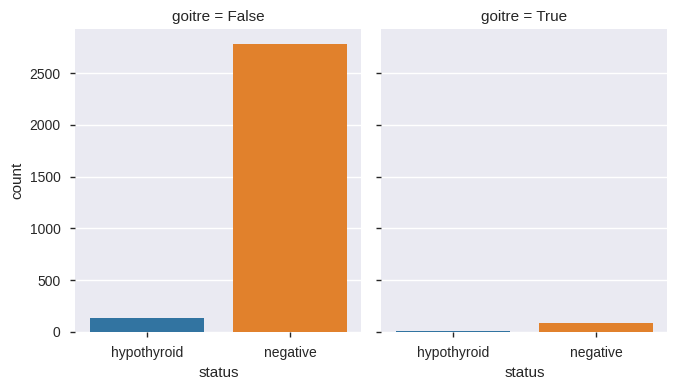

In [ ]:
# Plotting bar charts
sns.catplot("status", col="goitre", col_wrap=4, data=df_clean, kind="count", height=4, aspect=.8)
plt.show()

What do we observe through out? In all the cases that test False there are lots of people in that bracket. And there are more people who test positive compared to the True side. This means that majority of the people tested had no tumor, pregnancy, goitre, were not sick. This might tell us we need more samples that test positive to be in a position to make better predictions. 

### b. Bivariate analysis

#### Pair plots

In [ ]:
df_clean.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

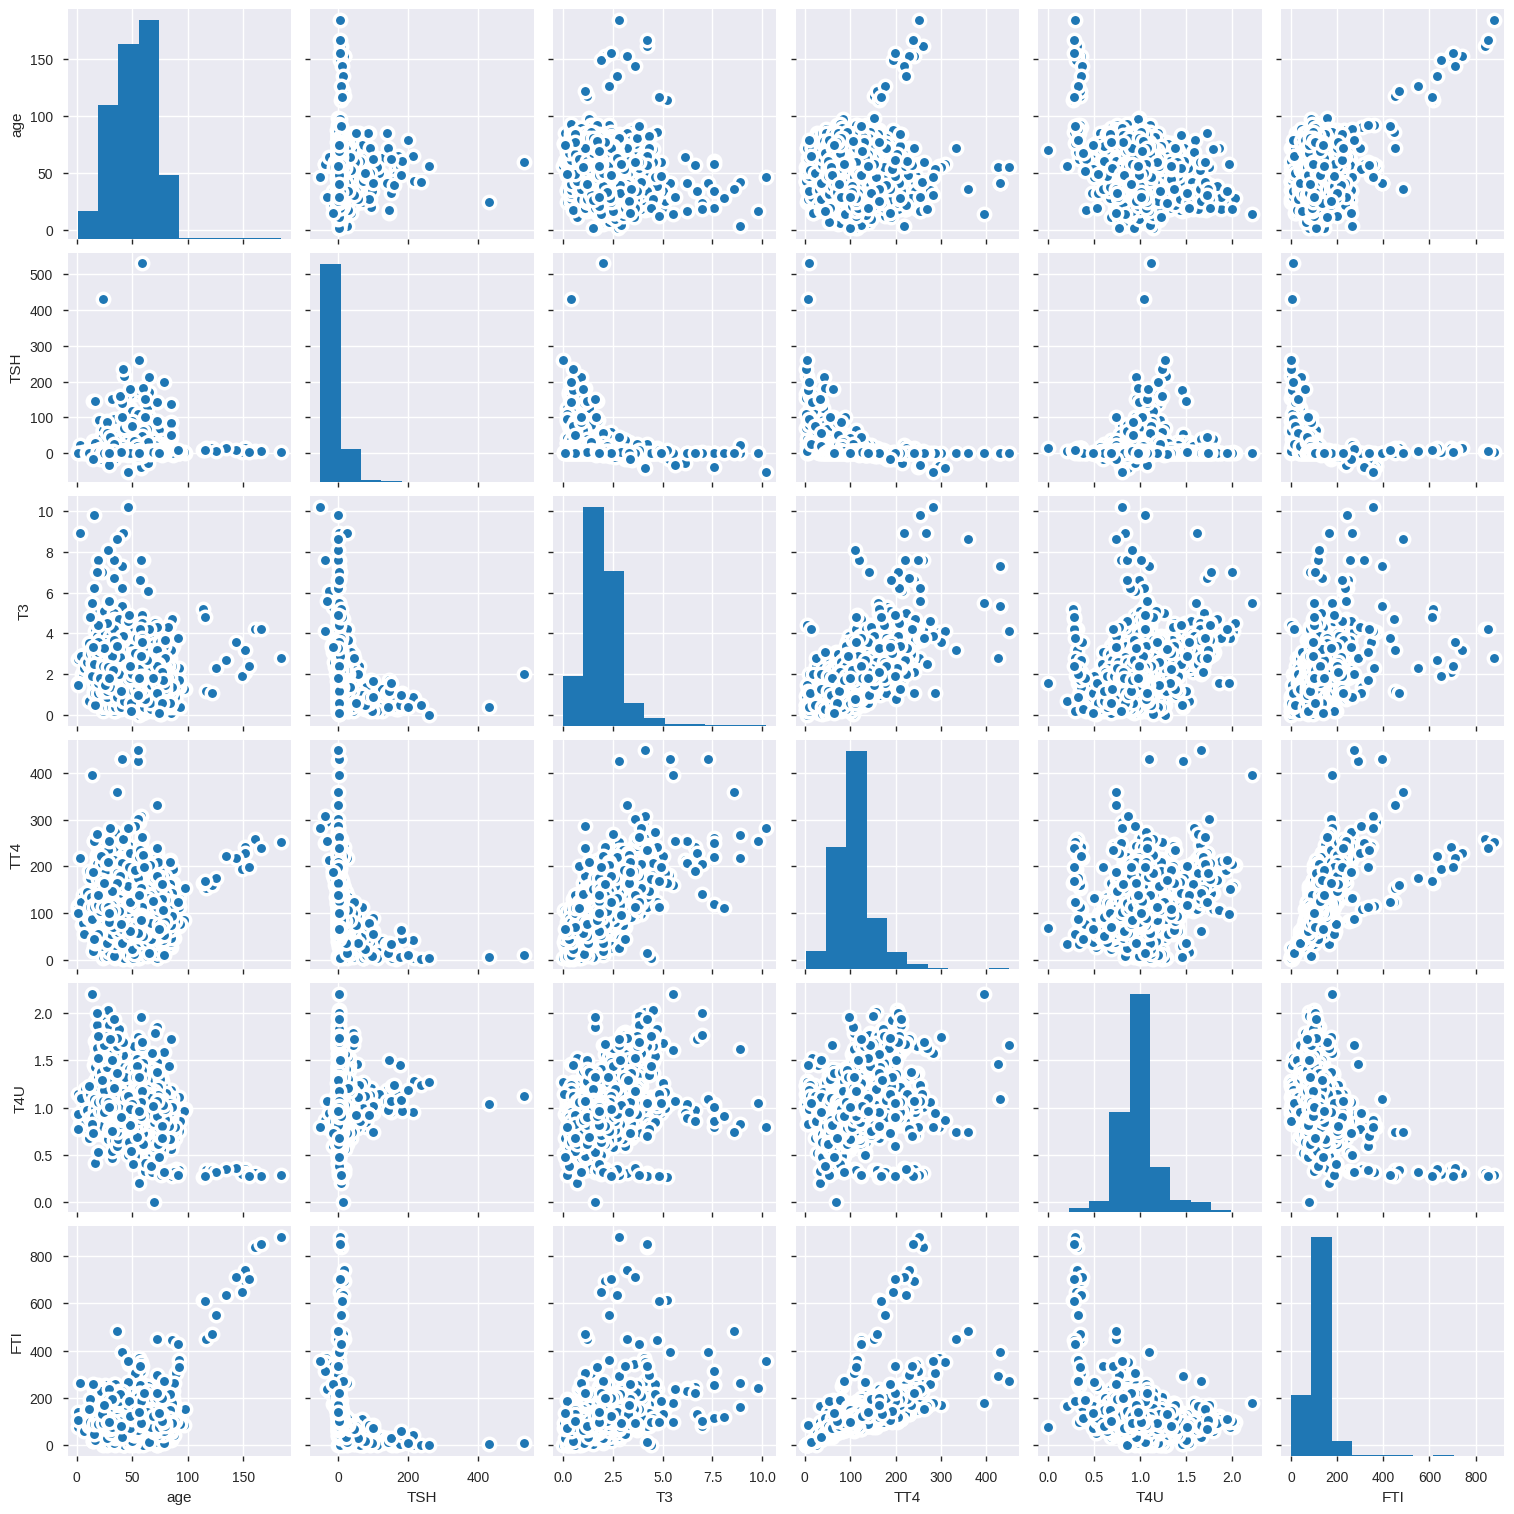

In [ ]:
# get the numerical data 
nums = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

sns.pairplot(df_clean[nums])
plt.show()

We observe that most of the pair plots have clusters around certain points. This tells us that most data point are common with our sample and thus anything else is viewed as an outlier.

#### Correlation

In [ ]:
# get the numerical data 
nums = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
# get the correlation
corr = df_clean[nums].corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.006341,-0.320394,-0.044709,-0.303514,0.279899
TSH,-0.006341,1.000000,-0.205218,-0.334661,0.083052,-0.265661
T3,-0.320394,-0.205218,1.000000,0.610945,0.408310,0.331610
TT4,-0.044709,-0.334661,0.610945,1.000000,0.325293,0.675650
T4U,-0.303514,0.083052,0.408310,0.325293,1.000000,-0.292658
FTI,0.279899,-0.265661,0.331610,0.675650,-0.292658,1.000000


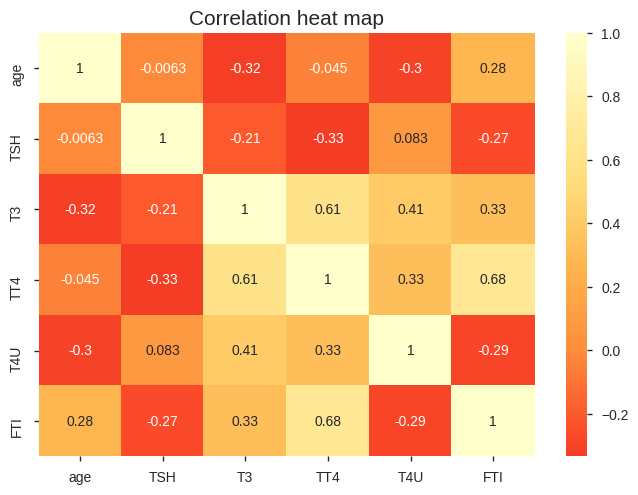

In [ ]:
sns.heatmap(corr, cmap='YlOrRd_r', annot = True, center = 0)
plt.title('Correlation heat map', fontsize = 15)
plt.show()

Correlation is the degree to which two pairs are linearly related. 

There is a positive strong relationship between TT4 and T3 of 0.61. There is also a positive strong relationship between FTI and TT4 of 0.68 (This is the highest positive correlation). 

### c. Multivariate analysis

## 5 Solution implementation 1.

### Random Forest classifier.

In [195]:
# make a copy of the data set
forest = df_clean.copy()
forest.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [196]:
# preview the data 
forest.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,age,TSH,T3,TT4,T4U,FTI
0,hypothyroid,M,False,False,False,False,False,False,False,False,False,False,False,y,y,y,y,y,72,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,F,True,False,False,False,False,False,False,False,False,False,False,y,y,y,y,y,15,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,M,False,False,False,False,False,False,False,False,False,False,False,y,y,y,y,y,24,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,F,False,False,False,False,False,False,False,False,False,False,False,y,y,y,y,y,24,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,M,False,False,False,False,False,False,False,False,False,False,False,y,y,y,y,y,77,7.3,1.2,57.0,1.28,44.0


#### Function

In [200]:
#### change the categorical and boolean columns to 0 and 1

# list of columns that are to categorical 
cat = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']

# list of columns that are boolean values
bool_ = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']
for column in bool_:
  forest[column] = np.where(forest[column] == 'False', 1, 0)

# yes no columns
for column in cat:
  forest[column] = np.where(forest[column] == 'y', 1, 0)

# we finish off by doing the same for sex
forest['sex'] = np.where(forest['sex'] == 'M', 1, 0)


In [201]:
# confirm the code worked
forest.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,age,TSH,T3,TT4,T4U,FTI
0,hypothyroid,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,7.3,1.2,57.0,1.28,44.0


In [210]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt

test_features = [ 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest.drop('status', axis = 1)
y = np.where(forest['status'] == 'hypothyroid', 1, 0)


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

class trees:
  def __init__(self, X, y, test_features):
    self.X = X
    self.y = y
    self.test_features = test_features
    
  def rand_tree(self, n, s, d):
    forest = RandomForestRegressor(n_estimators =n, random_state=42, min_samples_split =s, max_depth=d)
    forest = forest.fit(X_train, y_train)
    tree = DecisionTreeRegressor(max_depth=7)

    # Train it on our training set.
    tree = tree.fit(X_train, y_train)

    # Predict based on the model we've trained, note that we apply it to the whole data set 
    y_pred_tree = tree.predict(X)

    # Predict based on the model we've trained
    y_pred = forest.predict(X_test)
    comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
    print(comparison_frame.describe())

    # And now we assess the errors
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    def viz(self):
      dot_data = StringIO()
      # pick a specific tree from the forest
      tree = forest.estimators_[50]

      export_graphviz(tree, out_file=dot_data,  
                      filled=True, rounded=True,
                      special_characters=True,feature_names = test_features)
      graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
      graph.write_png('absenteism_forest.png')
      display(Image(graph.create_png()))
    viz(self)
    def imp(self):
      # Get numerical feature importances
      importances = list(tree.feature_importances_)

      # We now use some Python magic to connect each feature with its importance
      # List of tuples with variable and importance
      feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

      print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
      print()

      # Nice to have: We can sort the values in descending order, since we care about the most important features first.
      feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

      # Print out the feature and importances 
      [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

      # list of x locations for plotting
      x_values = list(range(len(importances)))
      # Make a bar chart
      plt.bar(x_values, importances, orientation = 'vertical')
      # Tick labels for x axis
      plt.xticks(x_values, test_features, rotation='vertical')
      # Axis labels and title
      plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
    imp(self)
 

#### Function  call 1


In [211]:
# call the function and pass in the independent and dependt variables
a = trees(X, y, test_features)

           Actual   Predicted
count  904.000000  904.000000
mean     0.038717    0.034490
std      0.193026    0.154828
min      0.000000    0.000301
25%      0.000000    0.000301
50%      0.000000    0.000385
75%      0.000000    0.001002
max      1.000000    0.986648
Mean Absolute Error: 0.022328767433226444
Mean Squared Error: 0.012973268535279098
Root Mean Squared Error: 0.1139002569587931


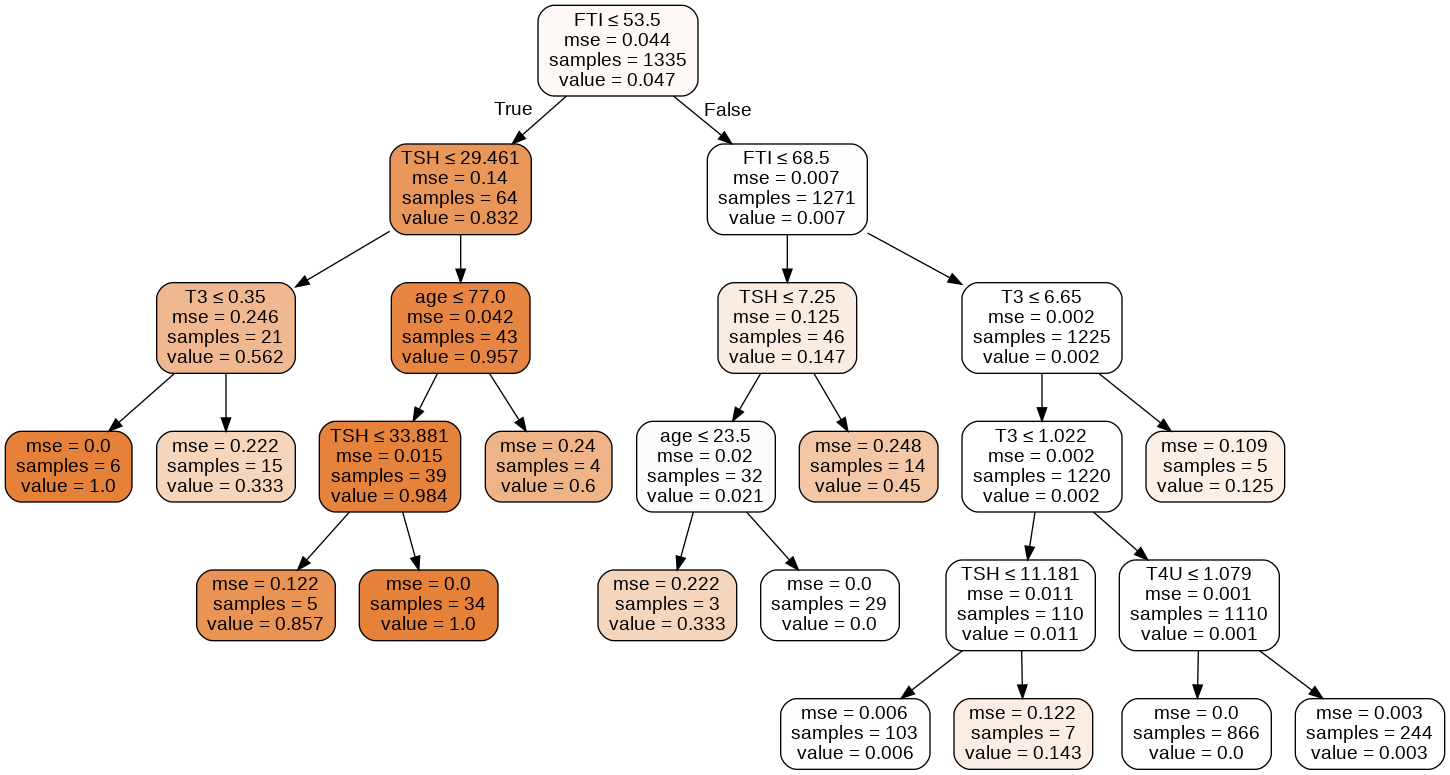

[('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('T3_measured', 0.0), ('TT4_measured', 0.0), ('T4U_measured', 0.0), ('FTI_measured', 0.0), ('age', 0.03), ('TSH', 0.13), ('T3', 0.04), ('TT4', 0.04), ('T4U', 0.04), ('FTI', 0.72)]

Variable: FTI                  Importance: 0.72
Variable: TSH                  Importance: 0.13
Variable: T3                   Importance: 0.04
Variable: TT4                  Importance: 0.04
Variable: T4U                  Importance: 0.04
Variable: age                  Importance: 0.03
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0

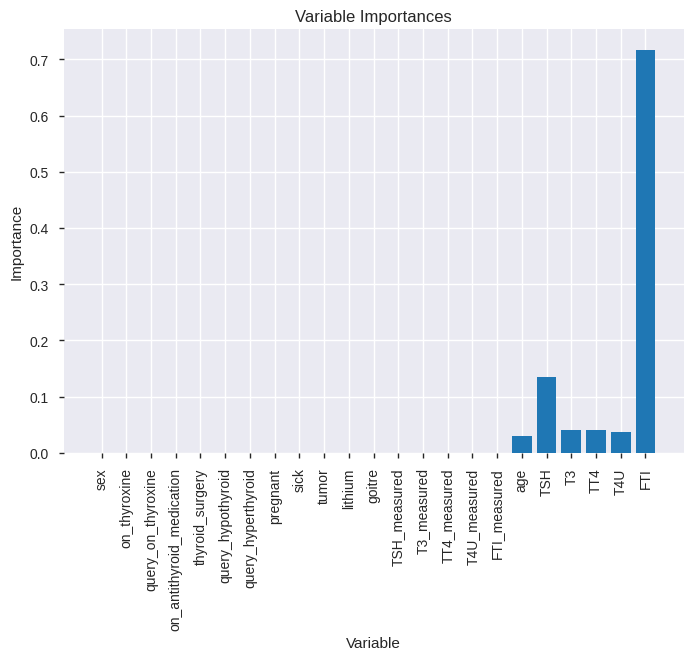

In [212]:
# here we pass in the number of n estimators, minimum sample splits and the maximum depth 
# they are in that order
# we start off with 300, 20, 5
a.rand_tree(300, 20, 5)

From our function we can see that the most important feature in our prediction is FTI followed by TSH, T3, TT4, T4U and lastly age. We do observe that only the categorical columns have an influence to the dependent variable.

#### Function call 2

           Actual   Predicted
count  904.000000  904.000000
mean     0.038717    0.034481
std      0.193026    0.154804
min      0.000000    0.000301
25%      0.000000    0.000301
50%      0.000000    0.000385
75%      0.000000    0.001002
max      1.000000    0.985940
Mean Absolute Error: 0.022307500255030494
Mean Squared Error: 0.012952927082215442
Root Mean Squared Error: 0.11381092690166196


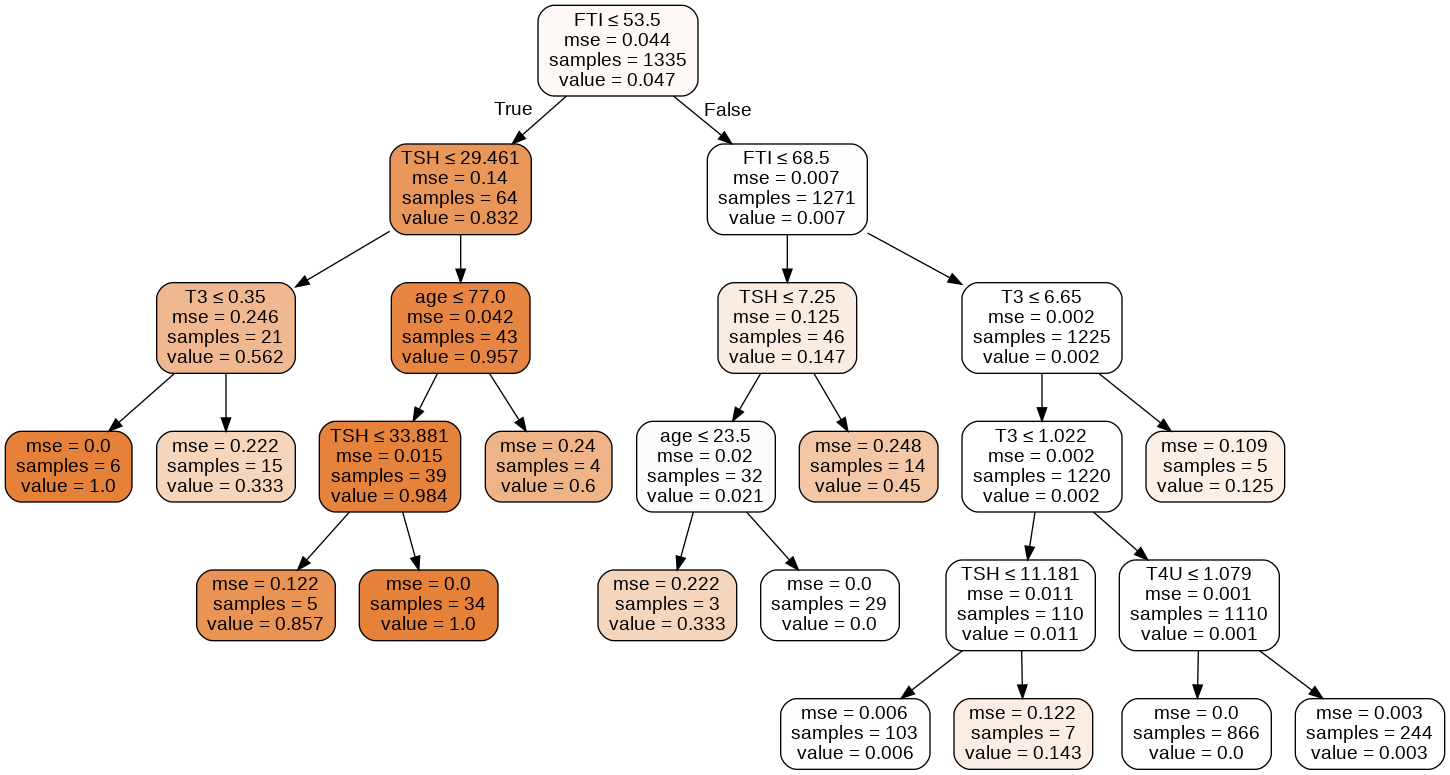

[('age', 0.03), ('TSH', 0.15), ('T3', 0.04), ('TT4', 0.03), ('T4U', 0.04), ('FTI', 0.71)]

Variable: FTI                  Importance: 0.71
Variable: TSH                  Importance: 0.15
Variable: T3                   Importance: 0.04
Variable: T4U                  Importance: 0.04
Variable: age                  Importance: 0.03
Variable: TT4                  Importance: 0.03


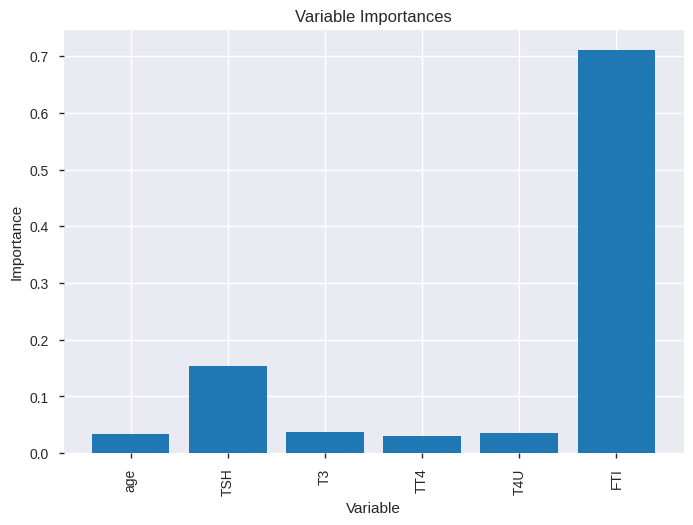

In [213]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# call the function and pass in the independent and dependt variables
a = trees(X, y, test_features)

# we start off with 300, 20, 5
a.rand_tree(300, 20, 5)

The RMSE has dropped from 0.1139 to 0.1138. The feature importance for FTI dropped from 0.72 to 0.71 while TSH increased from 0.13 to 0.15. T4U also dropped from 0.04 to 0.03. The rest of the feature importances remained the same.

#### Function call 3

We are now going to alter the size of the depth and min sample splits.

           Actual   Predicted
count  904.000000  904.000000
mean     0.038717    0.034881
std      0.193026    0.154469
min      0.000000    0.001870
25%      0.000000    0.001870
50%      0.000000    0.001904
75%      0.000000    0.001925
max      1.000000    0.941020
Mean Absolute Error: 0.02287705184771304
Mean Squared Error: 0.013047096667144946
Root Mean Squared Error: 0.11422388833840733


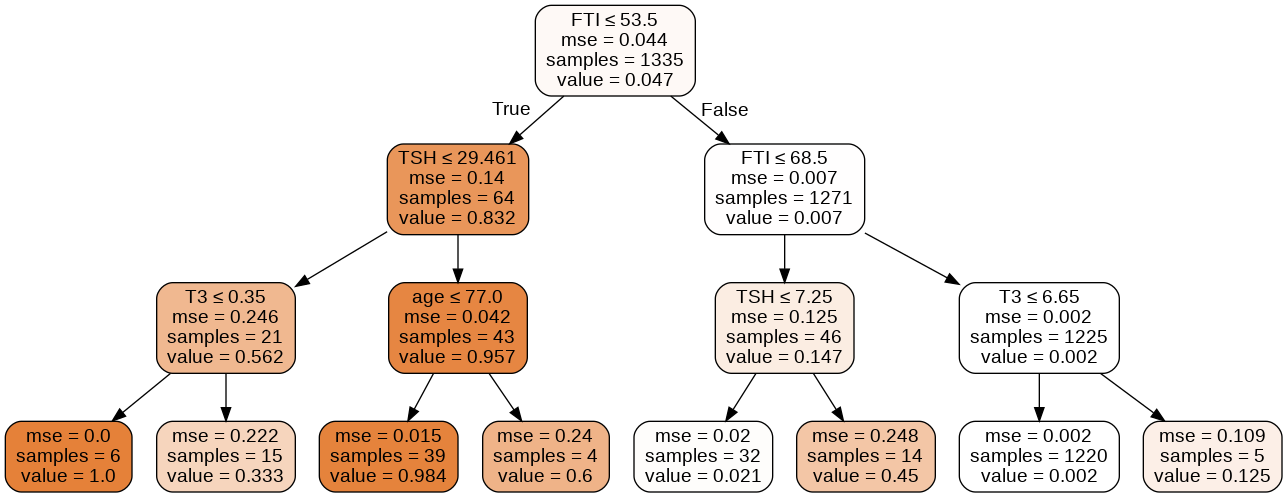

[('age', 0.04), ('TSH', 0.13), ('T3', 0.04), ('TT4', 0.05), ('T4U', 0.04), ('FTI', 0.71)]

Variable: FTI                  Importance: 0.71
Variable: TSH                  Importance: 0.13
Variable: TT4                  Importance: 0.05
Variable: age                  Importance: 0.04
Variable: T3                   Importance: 0.04
Variable: T4U                  Importance: 0.04


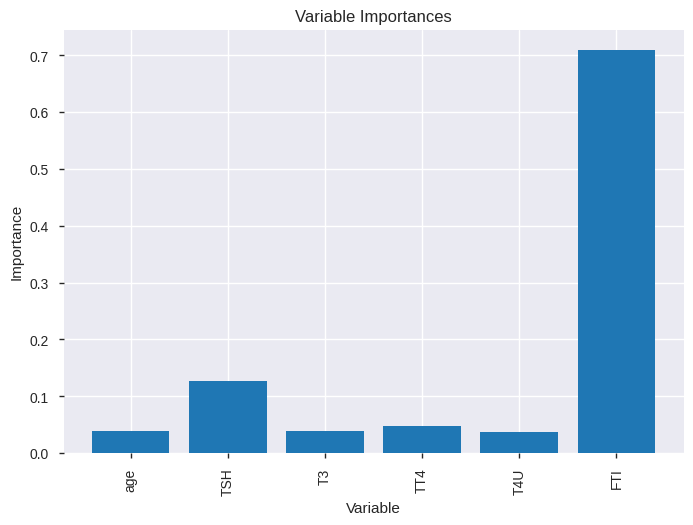

In [214]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# call the function and pass in the independent and dependt variables
a = trees(X, y, test_features)

# we start off with 300, 20, 3
a.rand_tree(300, 20, 3)

The RMSE increases from 0.1138 to 0.1142 so do the feature importances of TT4, age, T3, and T4U. That of TSH does drop. The increase in RMSE is not good since we need it to be low.

#### Function call 4

           Actual   Predicted
count  904.000000  904.000000
mean     0.038717    0.034775
std      0.193026    0.154611
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      0.000000    0.000000
max      1.000000    1.000000
Mean Absolute Error: 0.022698953697823963
Mean Squared Error: 0.013011676898452845
Root Mean Squared Error: 0.11406873760348558


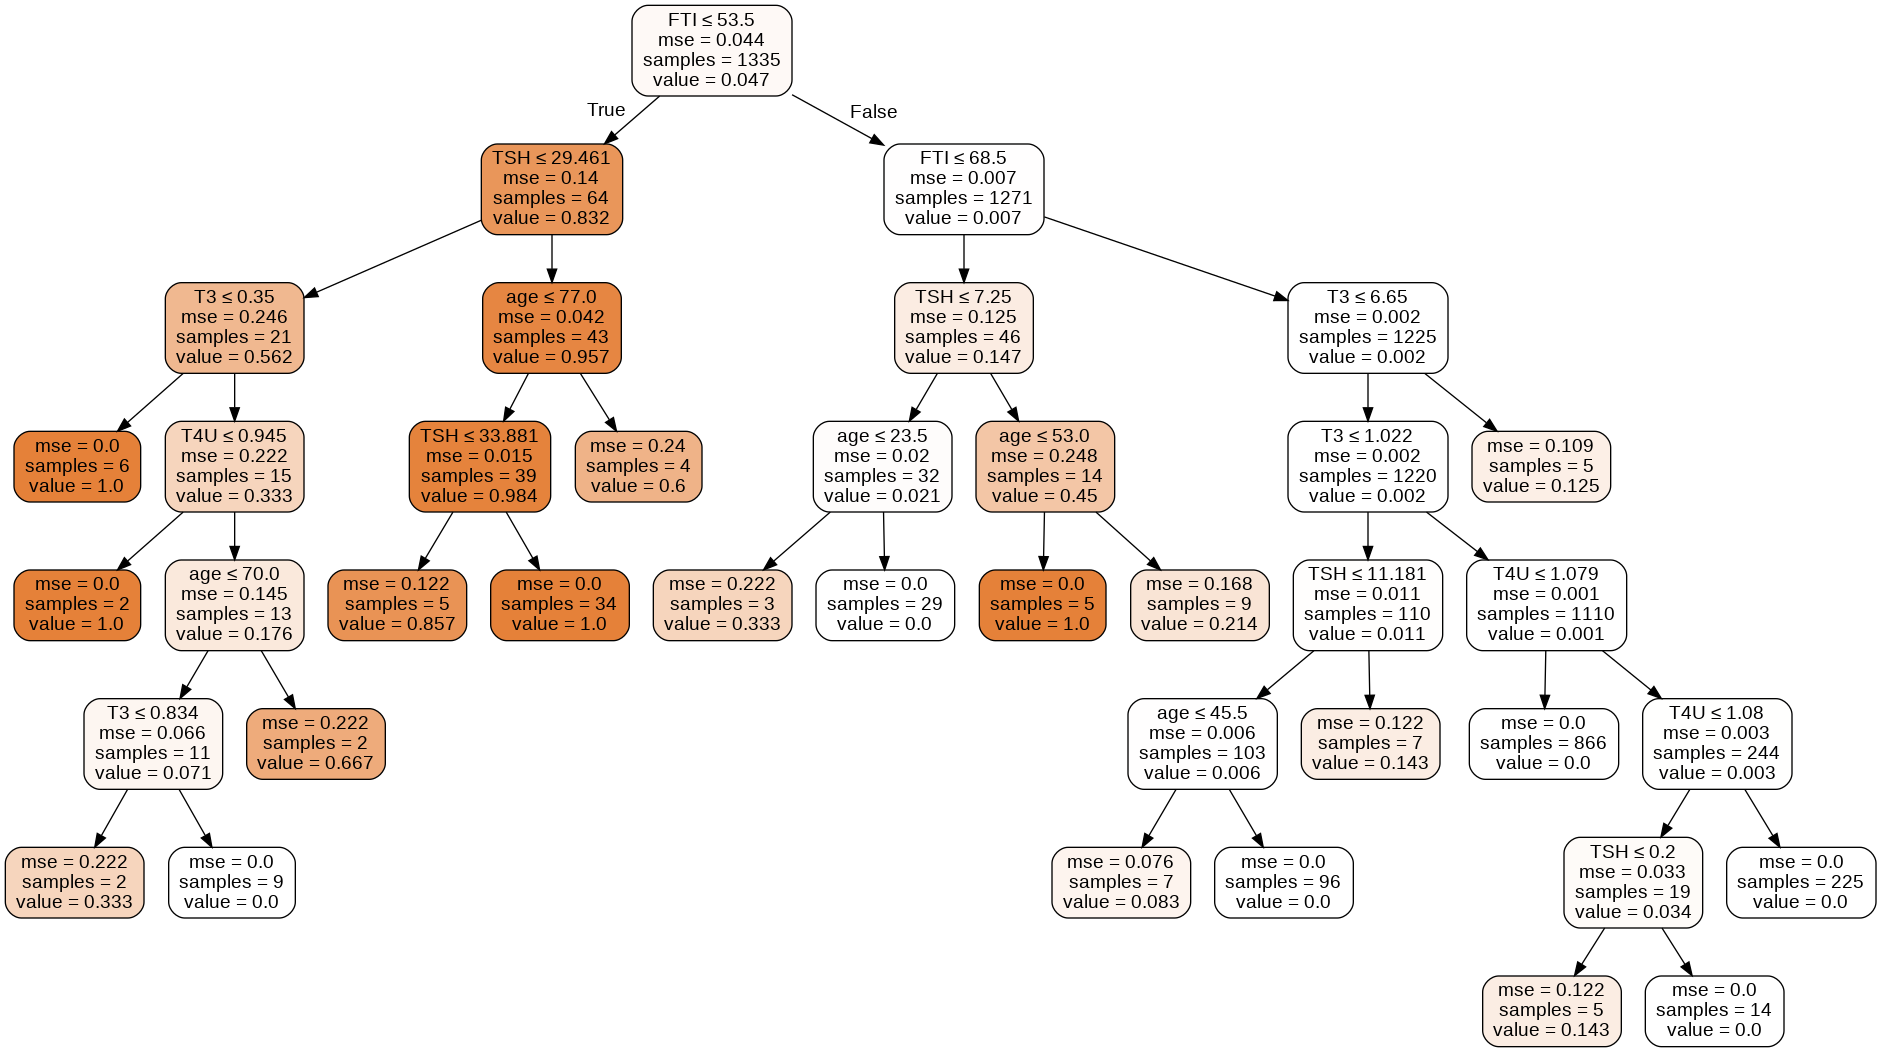

[('age', 0.03), ('TSH', 0.14), ('T3', 0.05), ('TT4', 0.04), ('T4U', 0.03), ('FTI', 0.71)]

Variable: FTI                  Importance: 0.71
Variable: TSH                  Importance: 0.14
Variable: T3                   Importance: 0.05
Variable: TT4                  Importance: 0.04
Variable: age                  Importance: 0.03
Variable: T4U                  Importance: 0.03


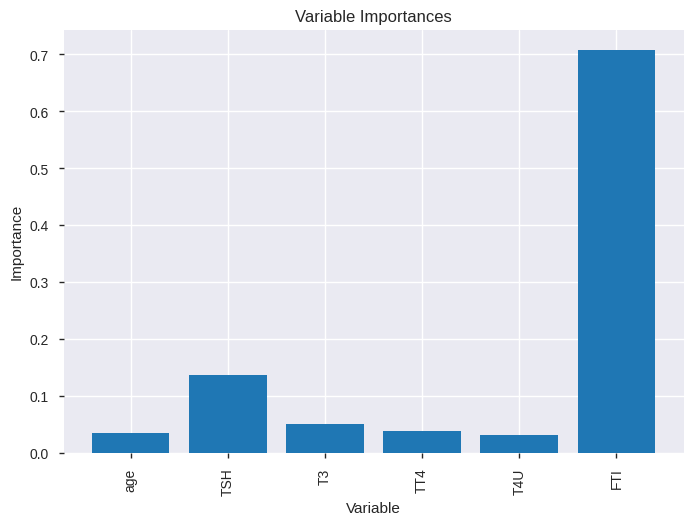

In [222]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# call the function and pass in the independent and dependt variables
a = trees(X, y, test_features)

# we start off with 300, 20, 5
a.rand_tree(300, 10, 20)

We observe that no matter how much we alter the values of max split, depth and n estimators there is little change. We conclude that for our model it best works with 300 n_estimators, minimum sample split of 20 and a depth of 5. This is when using the most important features as shown the the graph above.

### Ada Boost

In [ ]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# call the function and pass in the independent and dependt variables
a = trees(X, y, test_features)

# we start off with 300, 20, 5
a.rand_tree(300, 20, 5)

#### Function

In [233]:
rng = np.random.RandomState(1)
class ada:
  def __init__ (self, X, y):
    self.X = X
    self.y = y
  
  def adas(self, d, n):
    for i in np.arange(0, 6, 1):
      ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=d), n_estimators=n, random_state=rng)
      ada_boost = ada_boost.fit(X_train, y_train)
      y_pred_ada = ada_boost.predict(X.iloc[:, i])

      plt.figure()
      plt.scatter(X.iloc[:, i], y, c="k", label="training samples")
      plt.plot(X.iloc[:, i], y_pred_tree, c="r", label="single tree", linewidth=2)
      plt.plot(X.iloc[:, i], y_pred_ada, c="g", label="ada_{}".format(n), linewidth=2)

      plt.xlabel("data")
      plt.ylabel("target")
      plt.title("Basic data")
      plt.legend()
      plt.show()

In [234]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

a = ada(X, y)
a.adas(5, 500)

ValueError: ignored

### Gradient Boost

### Challenging the solution

## 6. Solution implementation 2.

### Challenging the solution

## 7. Conclusion